In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [4]:
TRAIN_DIR = "../data/data2/train"
TEST_DIR = "../data/data2/test"
BATCH_SIZE = 16        # 🔹 Reduced batch size
IMG_SIZE = (160, 160)  # 🔹 Smaller image size

In [5]:
# Load training dataset
train_ds = image_dataset_from_directory(
    TRAIN_DIR,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Load test dataset
test_ds = image_dataset_from_directory(
    TEST_DIR,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [6]:
# ✅ Print class names to confirm FAKE/REAL detected
print("Class names:", train_ds.class_names)

# Prefetch for performance (⚠️ removed cache to save memory)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(200).prefetch(buffer_size=AUTOTUNE)  # 🔹 Smaller shuffle buffer
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


Class names: ['FAKE', 'REAL']


In [7]:
# Build model with Transfer Learning
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # ✅ Lower LR for stability
    loss='binary_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# Train
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1588s 242ms/step - accuracy: 0.6932 - loss: 0.5844 - val_accuracy: 0.7613 - val_loss: 0.5011
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1583s 243ms/step - accuracy: 0.7506 - loss: 0.5127 - val_accuracy: 0.7811 - val_loss: 0.4752
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1595s 245ms/step - accuracy: 0.7624 - loss: 0.4955 - val_accuracy: 0.7816 - val_loss: 0.4649
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1614s 248ms/step - accuracy: 0.7654 - loss: 0.4880 - val_accuracy: 0.7822 - val_loss: 0.4608
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1601s 247ms/step - accuracy: 0.7698 - loss: 0.4831 - val_accuracy: 0.7894 - val_loss: 0.4537
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1596s 246ms/step - accuracy: 0.7704 - loss: 0.4817 - val_accuracy: 0.7954 - val_loss: 0.4500
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1610s 248ms/step - accuracy: 0.7724 - loss: 0.4796 - val_accuracy: 0.7941 - val_loss: 0.4482
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1596s 246ms/s

In [ ]:
# Save model
os.makedirs("../notebooks/models", exist_ok=True)
model.save("../notebooks/models/new_classifier.h5")
print("✅ Model saved at ../notebooks/models/new_classifier.h5")

✅ Model saved at ../models/new_classifier.h5


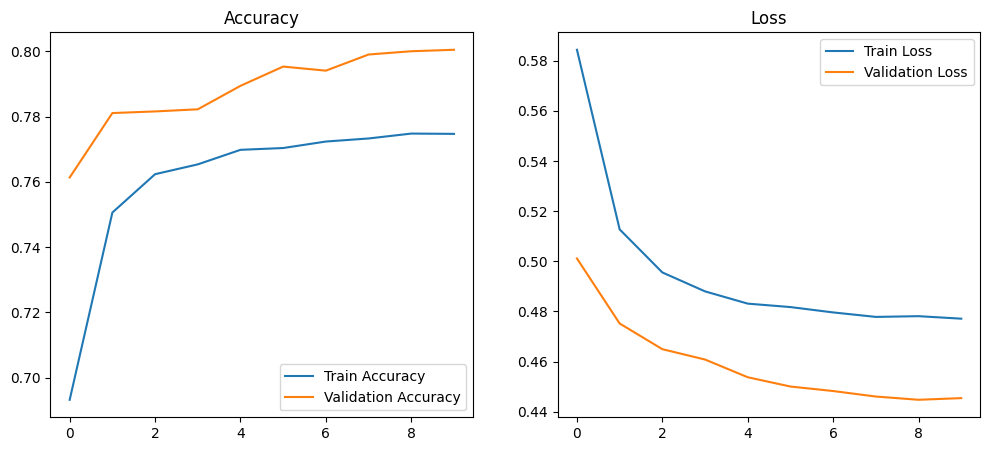

In [11]:
# Plot accuracy & loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

In [12]:
# Evaluate on test dataset
loss, acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {acc:.2f}")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 298s 238ms/step - accuracy: 0.8005 - loss: 0.4454
✅ Test Accuracy: 0.80
